### 뉴욕시티 에어비앤비 데이터 분석 EDA


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [ ]:
# 데이터 다운로드 하는 명령
!kaggle datasets download -d airplane2230/apparel-image-dataset-2

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 124MB/s]


In [ ]:
!unzip '*.zip' -d/content/ch06

Archive:  new-york-city-airbnb-open-data.zip
  inflating: /content/ch06/AB_NYC_2019.csv  
  inflating: /content/ch06/New_York_City_.png  


In [ ]:
#파일 불러오고 난 이후에 head, info, describe는 기본적으로 수행
df = pd.read_csv('/content/ch06/AB_NYC_2019.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
#info의 Non-null count를 통해 널값유무 판단 가능
#사용할 칼럼만 전처리를 진행하고 필요없는 칼럼은 널값있는경우 칼럼 전체 삭제
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df['room_type'].value_counts() #칼럼을 자세히 모르겠을때 어떤 자료인지 판단 
#범주형인걸 알수있음. 원핫인코딩 진행여부 판단.

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
df.isna().sum() #결측치 갯수

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
(df['reviews_per_month'].isna() & df['last_review'].isna()).sum() #두개 널값이 겹치는 갯수 100% 겹침

10052

In [ ]:
df['reviews_per_month'].isna().sum()

10052

In [ ]:
(df['number_of_reviews'] == 0 ).sum() #isna() 다른방법

10052

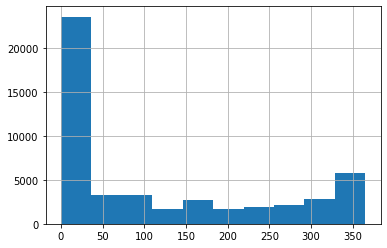

In [ ]:
df['availability_365'].hist()

In [ ]:
(df['availability_365'] == 0).sum() # 1년 등록일수가 0인 방갯수

17533

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.drop(['id','name','host_name','latitude','longitude'], axis=1, inplace = True) #필요없는 칼럼 삭제

In [ ]:
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


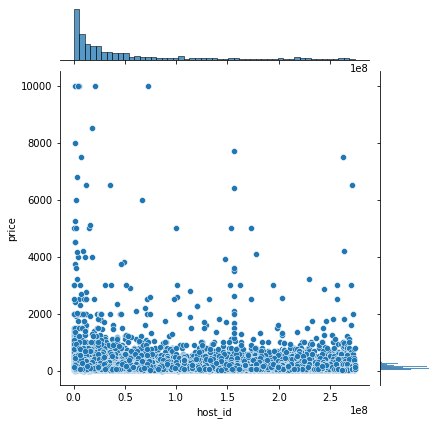

In [ ]:
sns.jointplot(x='host_id', y='price', data=df) #호스트 id 별 가격

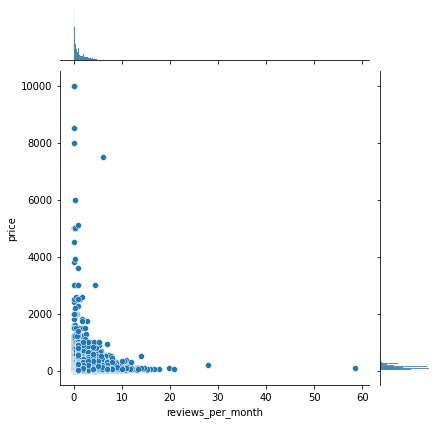

In [ ]:
sns.jointplot(x='reviews_per_month', y='price', data=df) #한달 리뷰수와 가격 그래프, 제일 싼거보단, 가성비가 있는게 리뷰가 더 많은 경향

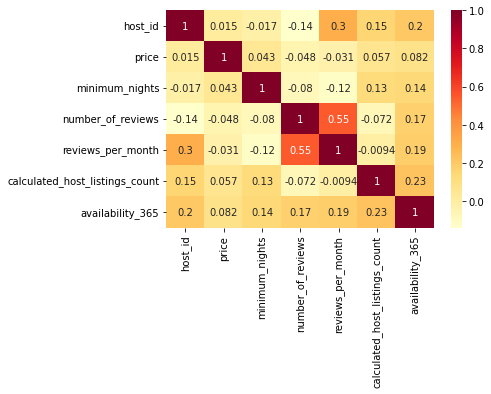

In [ ]:
sns.heatmap(df.corr(), annot= True, cmap="YlOrRd") #상관관계 확인 cmap = 컬러, annot은 옆에 범례? 유무 

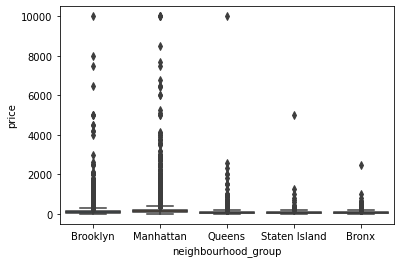

In [ ]:
#box plot
sns.boxplot(x='neighbourhood_group', y='price', data=df) # 지역별 가격

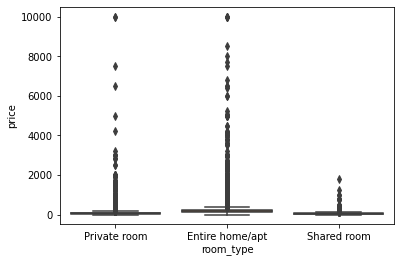

In [ ]:
sns.boxplot(x='room_type', y='price', data=df) #방 타입별 가격

## 전처리
 - 미입력데이터와 이상치 제거

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

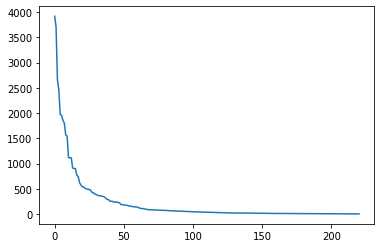

In [ ]:
neigh = df['neighbourhood'].value_counts()
plt.plot(range(len(neigh)), neigh)

In [ ]:
neigh.sort_values(ascending=False, inplace=True) #ascending = True <- 내림차순
neigh #length는 동네 수, 한개만있는 동네도 있음

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
neigh.index[50:]

Index(['Boerum Hill', 'Tribeca', 'Kensington', 'Sheepshead Bay',
       'Windsor Terrace', 'Brooklyn Heights', 'Canarsie', 'Forest Hills',
       'Bay Ridge', 'Borough Park',
       ...
       'Howland Hook', 'Lighthouse Hill', 'Silver Lake', 'West Farms',
       'Woodrow', 'Fort Wadsworth', 'Richmondtown', 'New Dorp', 'Rossville',
       'Willowbrook'],
      dtype='object', length=171)

In [ ]:
for nehood in range(len(df['neighbourhood'])): # 방갯수 상위 50번째 이후의 동네는 others 라는 동네로 합침
  if str(df.iloc[nehood]['neighbourhood']) in neigh[50:]:
    df.at[nehood,'neighbourhood'] = 'others'

In [ ]:
df['neighbourhood'].value_counts()

others                       6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood     

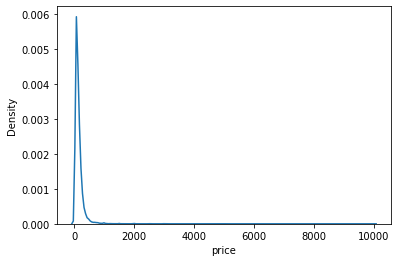

In [ ]:
sns.kdeplot(x=df['price']) #가격 분포

In [ ]:
print(df['price'].quantile(0.95)) #상위 5% 값
print(df['price'].quantile(0.005)) #하위 0.5% 값

355.0
26.0


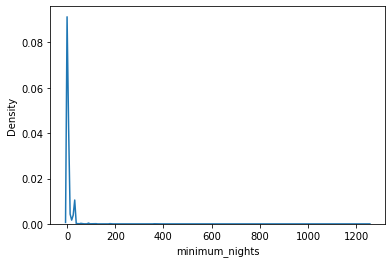

In [ ]:
sns.kdeplot(x=df['minimum_nights']) # 커널 밀도함수를 통해 최소숙박일수 이상치 확인

In [ ]:
print(df['minimum_nights'].quantile(0.98)) #한달살기까지 인정

30.0


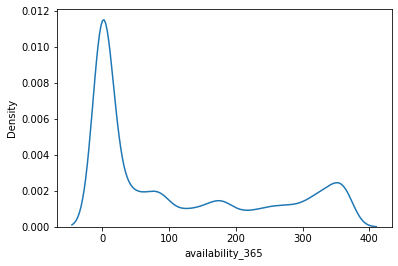

In [ ]:
sns.kdeplot(x=df['availability_365']) #일년 이용가능 일수

In [ ]:
print(df['availability_365'].quantile(0.3)) # 0일 유령방 제거

0.0


In [ ]:
# quantile, drop을 이용하여 outliner 제거
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)
print(p1,p2)

355.0 26.0


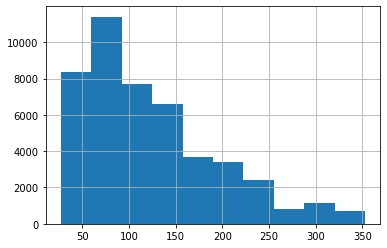

In [ ]:
df = df[(df['price'] < p1) & (df['price'] > p2 )] #이상치 제거후 확인

df['price'].hist()

In [ ]:
mn1 = df['minimum_nights'].quantile(0.98)
print(mn1)

30.0


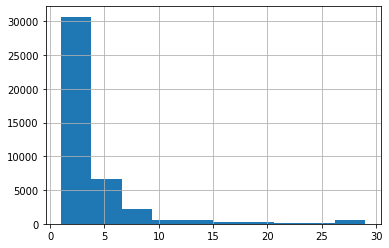

In [ ]:
df = df[df['minimum_nights'] < mn1]
df['minimum_nights'].hist()

In [ ]:
df['is_avail_zero'] = df['availability_365'].apply(lambda x: 'zero' if x == 0 else 'Nonzero')

미기입 누락 데이터 처리하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41980 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41980 non-null  int64  
 1   name                            41965 non-null  object 
 2   host_id                         41980 non-null  int64  
 3   host_name                       41960 non-null  object 
 4   neighbourhood_group             41980 non-null  object 
 5   neighbourhood                   41980 non-null  object 
 6   latitude                        41980 non-null  float64
 7   longitude                       41980 non-null  float64
 8   room_type                       41980 non-null  object 
 9   price                           41980 non-null  int64  
 10  minimum_nights                  41980 non-null  int64  
 11  number_of_reviews               41980 non-null  int64  
 12  last_review                     

In [ ]:
df['reviews_per_month'].head()

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
Name: reviews_per_month, dtype: float64

In [ ]:
df['review_exists'] = df['reviews_per_month'].isna().apply(lambda x: \
                                                           'No' if x is True else 'Yes')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41980 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41980 non-null  int64  
 1   name                            41965 non-null  object 
 2   host_id                         41980 non-null  int64  
 3   host_name                       41960 non-null  object 
 4   neighbourhood_group             41980 non-null  object 
 5   neighbourhood                   41980 non-null  object 
 6   latitude                        41980 non-null  float64
 7   longitude                       41980 non-null  float64
 8   room_type                       41980 non-null  object 
 9   price                           41980 non-null  int64  
 10  minimum_nights                  41980 non-null  int64  
 11  number_of_reviews               41980 non-null  int64  
 12  last_review                     

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
is_avail_zero                     0
review_exists                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41980 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         41980 non-null  int64  
 1   neighbourhood_group             41980 non-null  object 
 2   neighbourhood                   41980 non-null  object 
 3   room_type                       41980 non-null  object 
 4   price                           41980 non-null  int64  
 5   minimum_nights                  41980 non-null  int64  
 6   number_of_reviews               41980 non-null  int64  
 7   last_review                     41980 non-null  object 
 8   reviews_per_month               41980 non-null  float64
 9   calculated_host_listings_count  41980 non-null  int64  
 10  availability_365                41980 non-null  int64  
 11  is_avail_zero                   41980 non-null  object 
 12  review_exists                   

In [ ]:
df1 = df.copy()
df = df1

In [ ]:
# # 원핫인코딩 쉽게 하는 방법
# X_cat = df[['neighbourhood_group','neighbourhood',
#             'room_type','is_avail_zero', 'review_exists']]
# X_cat = pd.get_dummies(X_cat)
# X_cat.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,...,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avail_zero_Nonzero,is_avail_zero_zero,review_exists_No,review_exists_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
# 개어렵게 하는 방법
def merge_and_get(ldf, rdf, on, how='inner', index=None): 
  if index is True: 
    return pd.merge(ldf, rdf, how=how, left_index = True, 
                    right_index=True)
  else:
    return pd.merge(ldf,rdf, how=how,on = on)

In [ ]:
one_hot_df = merge_and_get(
  df1, pd.get_dummies(
    df1['neighbourhood_group'],prefix="neighbourhood_group"), on = None, index=True) 
one_hot_df = merge_and_get(
  one_hot_df , pd.get_dummies(
    df1['neighbourhood'],prefix="neighbourhood"), on = None, index=True) 
one_hot_df = merge_and_get(
  one_hot_df , pd.get_dummies(
    df1['room_type'],prefix="room_type"), on = None, index=True) 
one_hot_df = merge_and_get(
  one_hot_df , pd.get_dummies(
    df1['is_avail_zero'],prefix="is_avail_zero"), on = None, index=True) 
one_hot_df = merge_and_get(
  one_hot_df , pd.get_dummies(
    df1['review_exists'],prefix="review_exists"), on = None, index=True) 
one_hot_df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,...,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avail_zero_Nonzero,is_avail_zero_zero,review_exists_No,review_exists_Yes
0,2787,Brooklyn,others,Private room,149,1,9,2018-10-19,0.21,6,...,0,0,1,0,1,0,1,0,0,1
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,...,0,0,0,1,0,0,1,0,0,1
2,4632,Manhattan,Harlem,Private room,150,3,0,0,0.00,1,...,0,0,0,0,1,0,1,0,1,0
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,...,0,0,0,1,0,0,1,0,0,1
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
one_hot_df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'review_exists',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'neighbourhood_Astoria',
       'neighbourhood_Bedford-Stuyvesant', 'neighbourhood_Bushwick',
       'neighbourhood_Carroll Gardens', 'neighbourhood_Chelsea',
       'neighbourhood_Chinatown', 'neighbourhood_Clinton Hill',
       'neighbourhood_Crown Heights', 'neighbourhood_Ditmars Steinway',
       'neighbourhood_East Elmhurst', 'neighbourhood_East Flatbush',
       'neighbourhood_East Harlem', 'neighbourhood_East New York',
       'neighbourhood_East Village', 'neighbourhood_Elmhurst',
       'neighbourhood_Financial District', 'neighbourhood_Fl

In [ ]:
x_cat = one_hot_df

In [ ]:
x_cat.drop(['host_id','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews',
            'last_review','reviews_per_month','is_avail_zero','review_exists','availability_365','calculated_host_listings_count'], axis=1, inplace = True)
x_cat

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,...,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avail_zero_Nonzero,is_avail_zero_zero,review_exists_No,review_exists_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
48891,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
48892,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
48893,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [ ]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41980 entries, 0 to 48894
Data columns (total 63 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   neighbourhood_group_Bronx                41980 non-null  uint8
 1   neighbourhood_group_Brooklyn             41980 non-null  uint8
 2   neighbourhood_group_Manhattan            41980 non-null  uint8
 3   neighbourhood_group_Queens               41980 non-null  uint8
 4   neighbourhood_group_Staten Island        41980 non-null  uint8
 5   neighbourhood_Astoria                    41980 non-null  uint8
 6   neighbourhood_Bedford-Stuyvesant         41980 non-null  uint8
 7   neighbourhood_Bushwick                   41980 non-null  uint8
 8   neighbourhood_Carroll Gardens            41980 non-null  uint8
 9   neighbourhood_Chelsea                    41980 non-null  uint8
 10  neighbourhood_Chinatown                  41980 non-null  uint8
 11  ne

In [ ]:
viz_3 =sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=x_cat, kind='count')
viz_3.set_xticklabels(rotation=90)

In [ ]:
viz_3=sns.catplot(x='neighbourhood', hue='room_type', col='neighbourhood_group', data=x_cat, kind='count')
viz_3.set_xticklabels(rotation=90)

### Standard Scaler를 이용하여 정규 분포

  - StandardScaler
  - SVM이나 선형호귀, 로지스틱 회귀 모델은 데이터 분포가 정규분포를 따른다 가정을 했기 때문에 분포에 맞게 스케일링 해줘야 한다.
  

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'review_exists'],
      dtype='object')

In [ ]:
# StanderdScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'price', #정규화 하면 안되는 칼럼들 전부 삭제
                 'last_review','is_avail_zero', 'review_exists'], axis=1 ) 

scaler.fit(X_num) 
X_scaled = scaler.transform(X_num) # 정규화로 변환
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns) #정규화 된 값을 다시 데이터프레임으로 변환
X = pd.concat([X_scaled, x_cat], axis = 1)
y = df['price']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41980 entries, 0 to 48894
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   host_id                                  41980 non-null  float64
 1   minimum_nights                           41980 non-null  float64
 2   number_of_reviews                        41980 non-null  float64
 3   reviews_per_month                        41980 non-null  float64
 4   calculated_host_listings_count           41980 non-null  float64
 5   availability_365                         41980 non-null  float64
 6   neighbourhood_group_Bronx                41980 non-null  uint8  
 7   neighbourhood_group_Brooklyn             41980 non-null  uint8  
 8   neighbourhood_group_Manhattan            41980 non-null  uint8  
 9   neighbourhood_group_Queens               41980 non-null  uint8  
 10  neighbourhood_group_Staten Island        41980

## 회귀 알고리즘

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import time

In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
  start_time = time.time()
  neg_mse_scores = cross_val_score(model, X_data, y_target,
                                   scoring = 'neg_mean_squared_error', cv=5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)

  print('#####', model.__class__.__name__, '#####')
  print('실행시간{0:.0f}초'.format(time.time() - start_time))
  print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))
  print("")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings(action='ignore')
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4, n_jobs =1)
rf_reg = RandomForestRegressor(random_state=0, n_estimators = 1000,n_jobs =1)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators = 1000,n_jobs =1)
xgb_reg = XGBRegressor(n_estimators = 1000,n_jobs =1)
lgb_reg = LGBMRegressor(n_estimators = 1000,n_jobs =1)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X, y)

##### DecisionTreeRegressor #####
실행시간1초
5 교차 검증의 평균 RMSE : 53.352

##### RandomForestRegressor #####
실행시간1331초
5 교차 검증의 평균 RMSE : 51.097

##### GradientBoostingRegressor #####
실행시간351초
5 교차 검증의 평균 RMSE : 50.115

[01:40:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor #####
실행시간244초
5 교차 검증의 평균 RMSE : 49.364

##### LGBMRegressor #####
실행시간15초
5 교차 검증의 평균 RMSE : 50.147



In [ ]:
from sklearn.model_selection import train_test_split
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1)

In [ ]:
start_time = time.time()

dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)

rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)

xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

lgb_reg.fit(X_train, y_train)
lgb_pred = lgb_reg.predict(X_test)

print(' 실행시간 {0:.0f}초'.format(time.time() - start_time))

[02:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 실행시간 386초


#### DecisionTree 결과

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
print('#####' ,dt_reg.__class__.__name__ ,' ######')
print('MAE', mean_absolute_error(y_test, rf_pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, rf_pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, rf_pred))) # 평균제곱근오차
print('R2', r2_score(y_test, rf_pred)) # R2 스코어

##### DecisionTreeRegressor  ######
MAE 34.49549350581042
MSE 2395.298034897516
RMSE 48.941782097687415
R2 0.5308940203922669


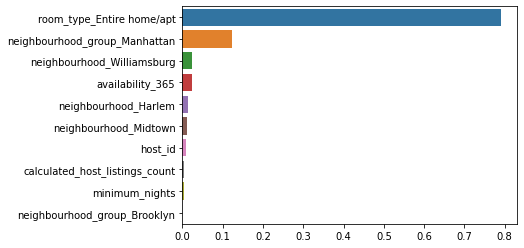

In [ ]:
# 특성중요도 파악하기
feature_series = pd.Series(data=dt_reg.feature_importances_, index=X.columns )
feature_series = feature_series.sort_values(ascending=False)[:10]
sns.barplot(x= feature_series, y=feature_series.index)

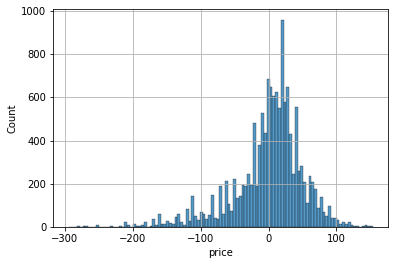

In [ ]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = dt_pred - y_test
sns.histplot(err)
plt.grid()

#### 랜덤포레스트 결과

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
print('#####' ,rf_reg.__class__.__name__ ,' ######')
print('MAE', mean_absolute_error(y_test, rf_pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, rf_pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, rf_pred))) # 평균제곱근오차
print('R2', r2_score(y_test, rf_pred)) # R2 스코어

##### RandomForestRegressor  ######
MAE 34.49549350581042
MSE 2395.298034897516
RMSE 48.941782097687415
R2 0.5308940203922669


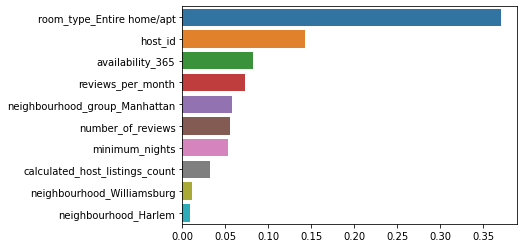

In [ ]:
# 특성중요도 파악하기
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X.columns )
feature_series = feature_series.sort_values(ascending=False)[:10]
sns.barplot(x= feature_series, y=feature_series.index)

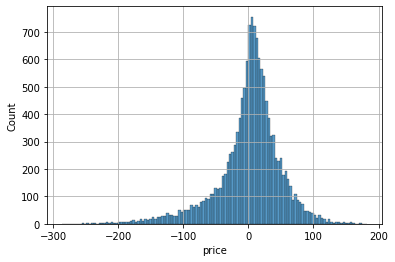

In [ ]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = rf_pred - y_test
sns.histplot(err)
plt.grid()

#### GB 결과

#### XGB 결과

#### LGBM 결과

## 딥러닝 알고리즘

In [ ]:
X.info()

In [ ]:
# StanderdScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'price', #정규화 하면 안되는 칼럼들 전부 삭제
                 'last_review','is_avail_zero', 'review_exists'], axis=1 ) 

scaler.fit(X_num) 
X_scaled = scaler.transform(X_num) # 정규화로 변환
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns) #정규화 된 값을 다시 데이터프레임으로 변환
# X = pd.concat([X_scaled, x_cat], axis = 1)
y = df['price']

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(29386, 6) (29386,)
(12594, 6) (12594,)


In [ ]:
np.mean(X_train, axis = 1).shape

(29386,)

In [ ]:
X_train[1,]

NameError: ignored

In [ ]:
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential()
  model.add(Dense(64, activation = 'relu', input_shape = (X_train[1,],)))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.3)

In [ ]:
model = get_model()
history = model.fit(X_train, y_train,
                    shuffle = True,
                    epochs =200,
                    validation_data = (X_val, y_val))
model.evaluate(X_test, y_test)

Epoch 1/200
643/643 [==============================] - 4s 4ms/step - loss: 8385.7363 - mae: 70.2513 - val_loss: 5211.3428 - val_mae: 57.3234
Epoch 2/200
643/643 [==============================] - 2s 2ms/step - loss: 4945.3506 - mae: 55.7238 - val_loss: 5036.5166 - val_mae: 55.9763
Epoch 3/200
643/643 [==============================] - 2s 2ms/step - loss: 4849.0654 - mae: 55.3183 - val_loss: 4983.4473 - val_mae: 56.3489
Epoch 4/200
643/643 [==============================] - 2s 3ms/step - loss: 4808.0938 - mae: 55.1381 - val_loss: 4949.7148 - val_mae: 56.0425
Epoch 5/200
643/643 [==============================] - 2s 3ms/step - loss: 4784.3159 - mae: 54.9999 - val_loss: 4932.1401 - val_mae: 55.7487
Epoch 6/200
643/643 [==============================] - 2s 2ms/step - loss: 4773.2852 - mae: 54.9452 - val_loss: 4923.9941 - val_mae: 55.0290
Epoch 7/200
643/643 [==============================] - 2s 3ms/step - loss: 4758.9551 - mae: 54.8309 - val_loss: 4917.2285 - val_mae: 54.9336
Epoch 8/200
6

[4577.37060546875, 53.059364318847656]

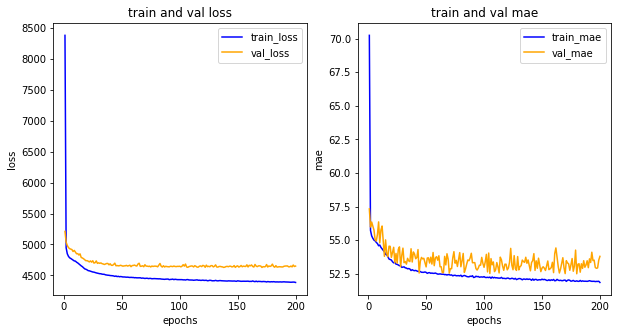

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

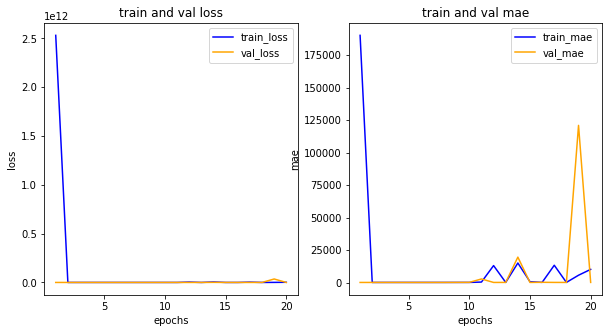

In [ ]:
from sklearn.model_selection import train_test_split
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(29386, 69) (29386,)
(12594, 69) (12594,)


In [ ]:
np.mean(X_train, axis = 1).shape

(29386,)

In [ ]:
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential()
  model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.3)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(20570, 69) (20570,)
(8816, 69) (8816,)


In [ ]:
model = get_model()
history = model.fit(X_train, y_train,
                    shuffle = True,
                    epochs =100,
                    validation_data = (X_val, y_val))
model.e

valuate(X_test, y_test)

Epoch 1/100
643/643 [==============================] - 3s 3ms/step - loss: 4107.3501 - mae: 45.3168 - val_loss: 2452.9458 - val_mae: 34.2861
Epoch 2/100
643/643 [==============================] - 2s 3ms/step - loss: 2442.0681 - mae: 35.3970 - val_loss: 2367.6726 - val_mae: 34.8441
Epoch 3/100
643/643 [==============================] - 2s 3ms/step - loss: 2408.8513 - mae: 35.0747 - val_loss: 2363.2119 - val_mae: 35.3277
Epoch 4/100
643/643 [==============================] - 2s 3ms/step - loss: 2393.8838 - mae: 34.9180 - val_loss: 2343.1782 - val_mae: 34.4239
Epoch 5/100
643/643 [==============================] - 2s 3ms/step - loss: 2375.9805 - mae: 34.7287 - val_loss: 2348.7629 - val_mae: 34.0181
Epoch 6/100
643/643 [==============================] - 2s 3ms/step - loss: 2368.5845 - mae: 34.6823 - val_loss: 2348.3618 - val_mae: 34.0113
Epoch 7/100
643/643 [==============================] - 2s 3ms/step - loss: 2364.7197 - mae: 34.6146 - val_loss: 2350.5002 - val_mae: 33.7068
Epoch 8/100
6

[2561.8251953125, 36.45548629760742]

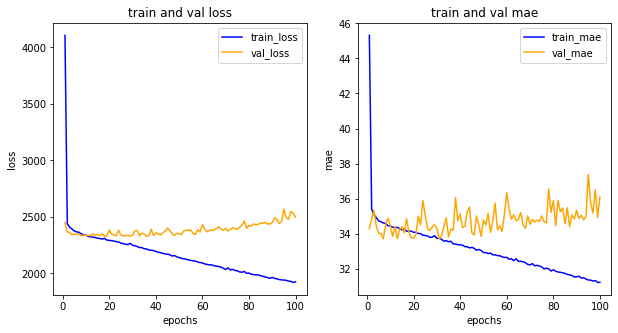

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()